In [1]:
import pandas as pd

In [2]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sb

In [20]:
import etl

In [21]:
import mltool

In [22]:
import sklearn

In [23]:
model = mltool.Model()

In [24]:
breast = pd.read_csv('https://datahub.io/machine-learning/breast-w/r/breast-w.csv', na_values = ["?"])

In [25]:
breast_train, breast_test = model.split_train_test(breast, target = 'Class')

In [26]:
model.learn(breast_train, target = 'Class', kind = 'RF')

In [27]:
model.predict(breast_test)

,Class
0,malignant
1,benign
2,benign
3,benign
4,benign
...,...
135,malignant
136,malignant
137,benign
138,benign


In [28]:
model.accuracy(breast_train)

1.0

In [29]:
model.accuracy(breast_test)

0.9642857142857143

In [32]:
fi = model.feature_importances(breast_test, 10)

<AxesSubplot:>

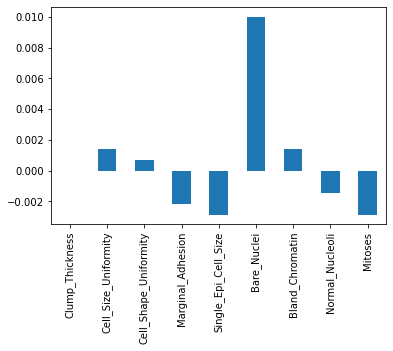

In [33]:
fi.plot.bar()

In [34]:
accTest = []
accTrain = []
numTrees = [5, 10, 15, 20, 30, 40, 50]

for t in numTrees:
    model.learn(breast_train, target = 'Class', kind = 'RF', n_estimators = t)
    accTest.append(model.accuracy(breast_test))
    accTrain.append(model.accuracy(breast_train))

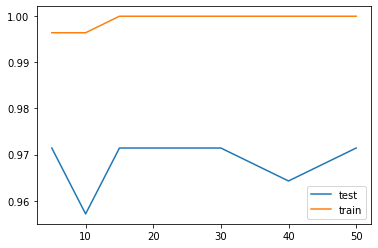

In [39]:
plt.plot(numTrees, accTest); plt.plot(numTrees, accTrain); plt.legend(["test","train"])

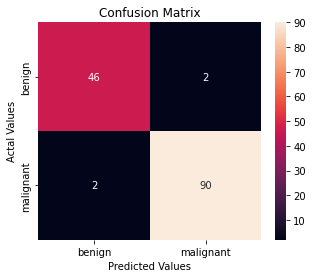

In [41]:
cm = model.confusion(breast_test)
cm_df = pd.DataFrame(cm,
                    index = ['benign', 'malignant'],
                    columns = ['benign', 'malignant'])
plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()